### Orbits to Analyse:

- Days 279-281, 2012 (windowsize=7, estimatedNumCrossings=11) (good)

- Days 221-223, 2005 (windowsize=7, estimatedNumCrossings=2) (good)

- Days 253-255, 2005 (windowsize=7, estimatedNumCrossings=3) (average)

- Days 273-275, 2005 (windowsize=7, estimatedNumCrossings=6) (very good)

- Days 102-108, 2005 (windowsize=7, estimatedNumCrossings=1)

- Days 171-176, 2005 (windowsize=7, estimatedNumCrossings=)*done

- Days 60-65 2005 entry into magnetosheath.(windowsize=7, estimatedNumCrossings=5)

- Days 72-75 2005 exit out of magnetosheath.(windowsize=7, estimatedNumCrossings=20)

- Days 75-85 2005 (windowsize=7, estimatedNumCrossings=18) *done


#### Functions we have in the `Functions.py` file
`get_data2()`

`plot_KSM(data, year, start_day, end_day, xFormat = "Hour")`: This function plots the Elevation, Azimuth and Total B_Field for a specified orbit

`fill_data(data)`: Add columns for $R_s=(z^2 + y^2)^{0.5}$ and the elevation and azimuthal angles

`get_day_data(daymin, daymax, year)`: Returns a sample of the data for a given day range and year

`crossings_graph(daymin, daymax, year)`: Plots the bow shock and magnetopause crossings

`smoothdata(data,windowsize,polyorder)`

`identify_crossings_2(orbit_data, windowsize, estimatedNumCrossings, start_day, end_day, year,
               polyorder=3, edge_ord=2, crossing_interval=200)`: 
               
Retrieve times where Cassini crosses Saturn's bow shock on a prolonged basisin data that is restricted to a specified timeframe

`calc_theta`: Calculates the values of r and cos(theta) given a coordinate.

`calc_L(coordinates)`

`SolarWind(L)`

` RSNeq(x)`

`RMP(x0, epsilon)`

`masters(data)`

`crossing_time(entries, exits)`

`extract_B_vector(start_time, end_time, data)`

`divide(data, num_of_intervals)`

`average_B(data)`

`nCP(BD_average,BU_average)`

`shock_angle(BU_average,nCP)`

`subinterval_values(BU_div,BD_div)`

In [1]:
from Functions import *


In [3]:
windowsize = 7
estimatedNumCrossings = 5
year = 2004
start_day = 299
end_day = 313
day_data1 = get_day_data(start_day, end_day, year)

Sample start date:  2004-10-25 00:00:30 
Sample end date: 2004-11-08 00:00:30


Start Date:  2004-10-25 00:00:30
End Date:  2004-11-07 23:59:30


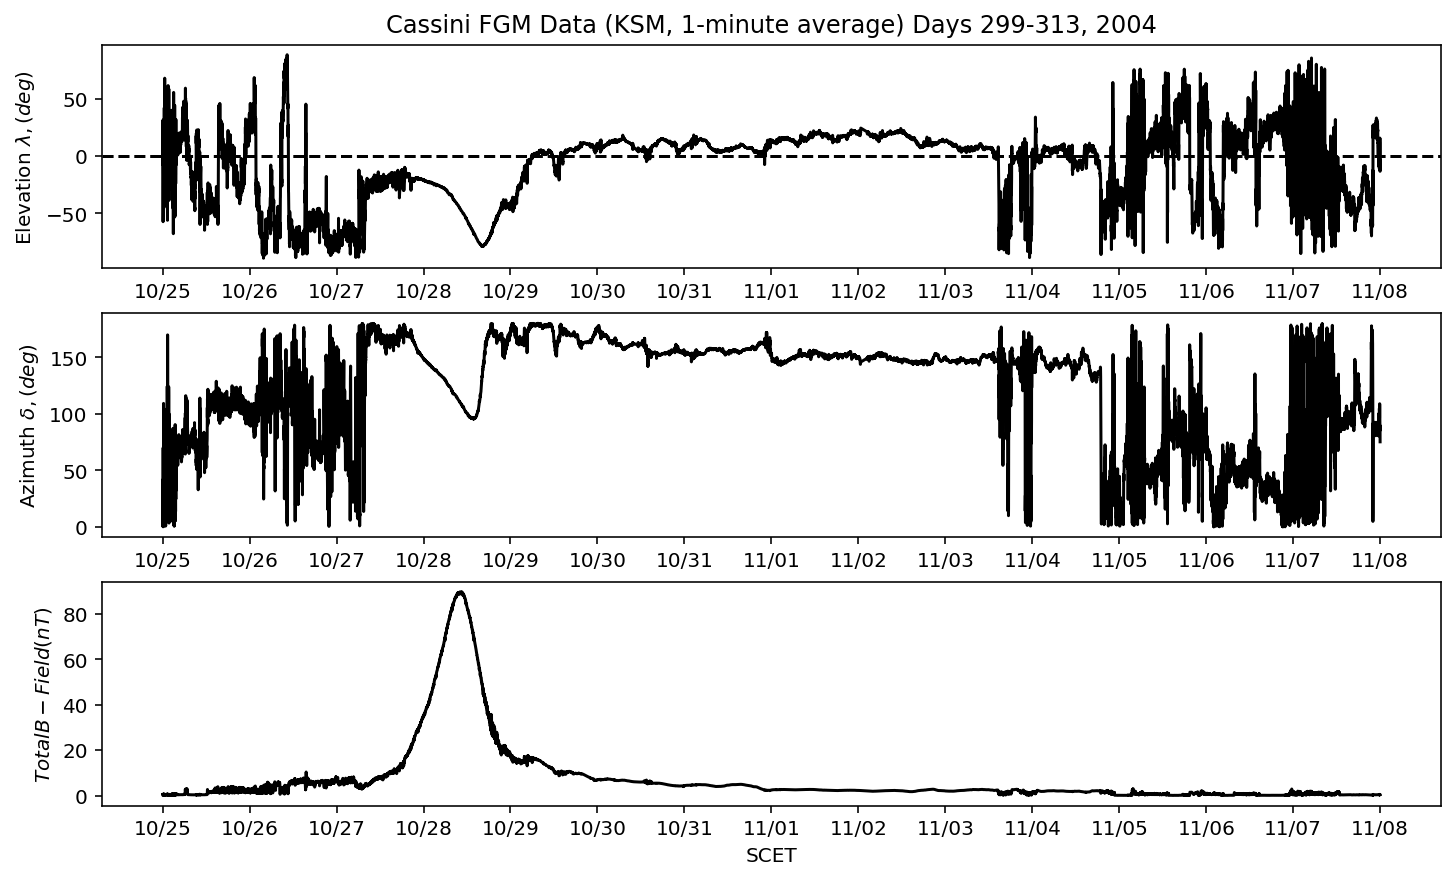

In [6]:
plot_KSM(day_data1, year, start_day, end_day, xFormat = "Day")
#entries1, exits1, ax1, ksmcoords_2_1,cross_array1= identify_crossings_2(day_data1, windowsize, estimatedNumCrossings,3,2,200)

Sample start date:  2004-11-04 19:12:30 
Sample end date: 2004-11-08 00:00:30
Start Date:  2004-11-04 19:12:30
End Date:  2004-11-07 23:59:30


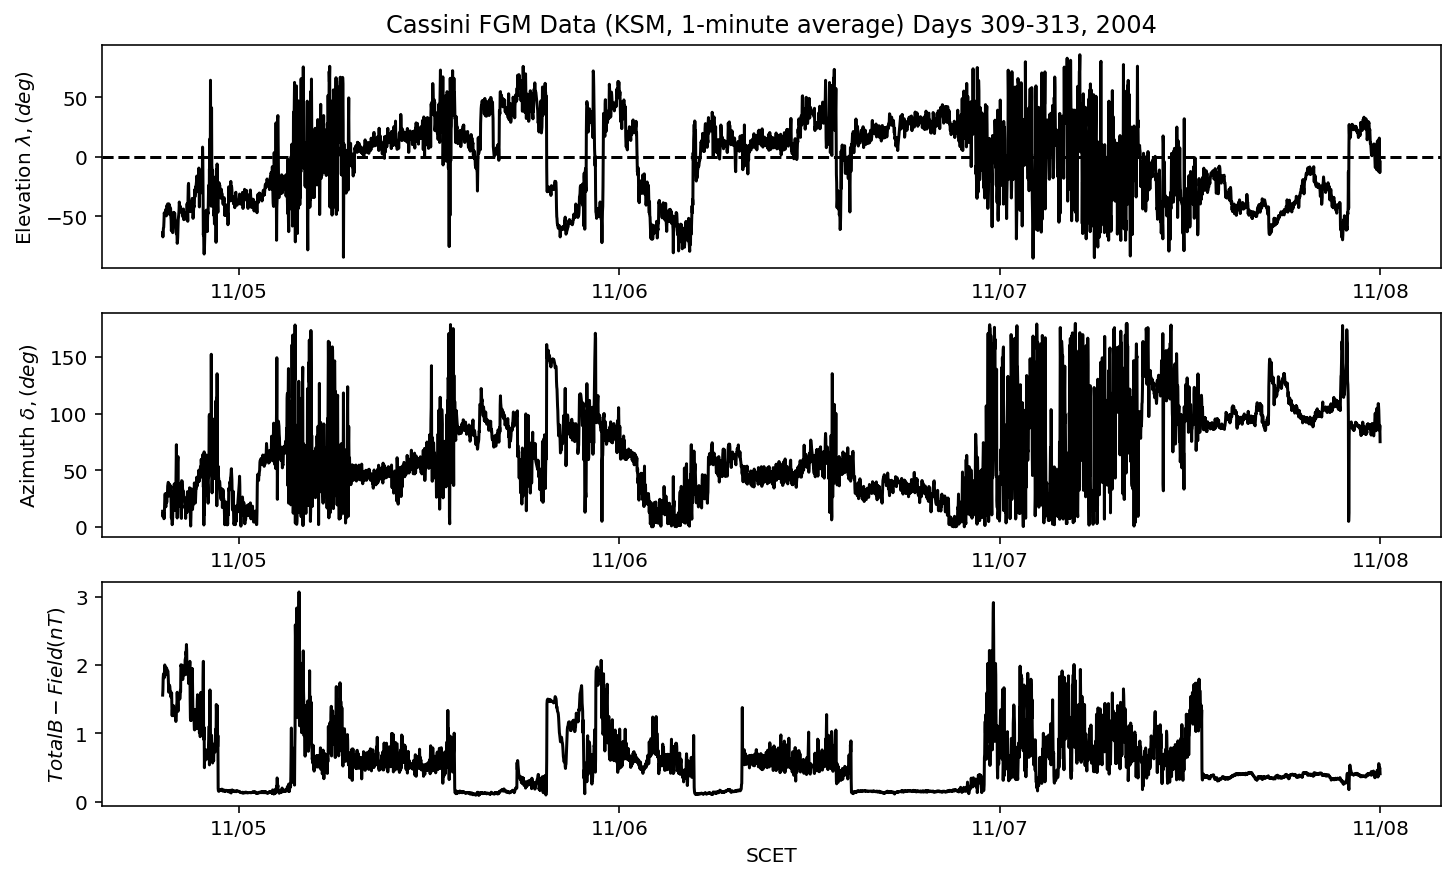

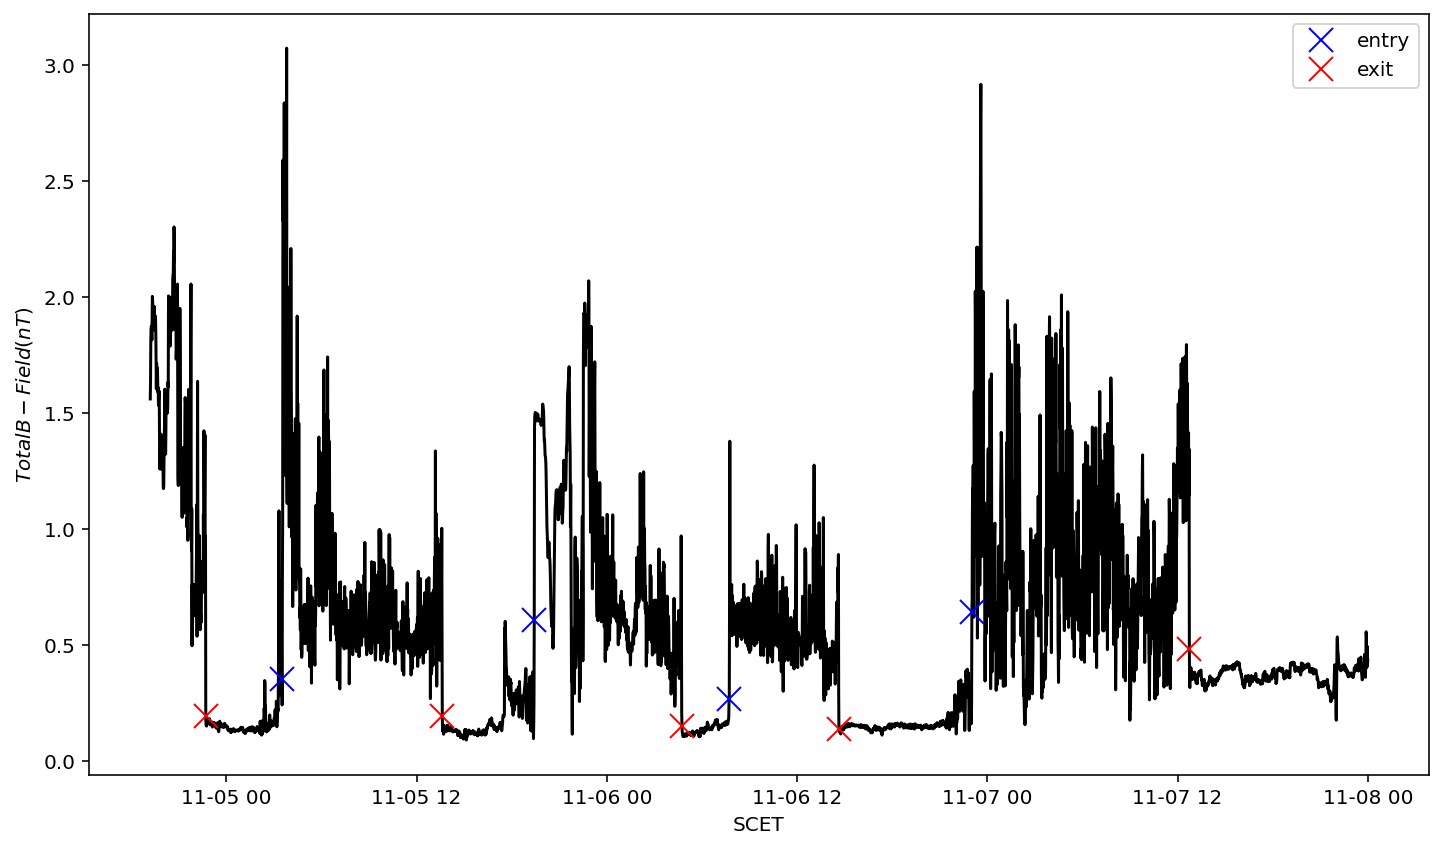

In [5]:
estimatedNumCrossings = 14

start_day2 = 309.8
end_day2 = 313
day_data2_2004 = get_day_data(start_day2, end_day2, year)
plot_KSM(day_data2_2004, year, 309, end_day2, xFormat = "Day")
plt.savefig("data_plotted.png")
entries2, exits2, ax2, ksmcoords_2,cross_array2 = identify_crossings_2(day_data2_2004, windowsize, estimatedNumCrossings,3,2,430)

In [0]:
print(ksmcoords_2)
print(cross_array)
array_list = crossing_time(entries, exits)

In [0]:
def extract_B_vector2(crossing_time, data,mins):
    """This function extracts the B vector for the given time interval"""
    crossing_index =  list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(crossing_time)

    B_X1 = data["BX"][crossing_index+6:crossing_index+mins]
    B_Y1 = data["BY"][crossing_index+6:crossing_index+mins]
    B_Z1 = data["BZ"][crossing_index+6:crossing_index+mins]
    
    B_vector1 = np.array([B_X1,B_Y1,B_Z1])#B after crossing
    B_X2 = data["BX"][crossing_index-mins:crossing_index-6]
    B_Y2 = data["BY"][crossing_index-mins:crossing_index-6]
    B_Z2 = data["BZ"][crossing_index-mins:crossing_index-6]
    B_vector2 = np.array([B_X2,B_Y2,B_Z2])#B before crossing
    return B_vector1,B_vector2

In [0]:
##Only taking data close to the crossings
S1_BD,S1_BU=extract_B_vector2(cross_array[0], day_data_2004,68)
ncp1,shock_value1,ave_shock1,std1=ncp_shock(S1_BD,S1_BU,8,1)

S2_BU,S2_BD=extract_B_vector2(cross_array[1], day_data_2004,68)
ncp2,shock_value2,ave_shock2,std2=ncp_shock(S2_BD,S2_BU,8,2)

S3_BD,S3_BU=extract_B_vector2(cross_array[2], day_data_2004,68)
ncp3,shock_value3,ave_shock3,std3=ncp_shock(S3_BD,S3_BU,8,3)

S4_BU,S4_BD=extract_B_vector2(cross_array[3], day_data_2004,68)
ncp4,shock_value4,ave_shock4,std4=ncp_shock(S4_BD,S4_BU,8,4)

In [0]:
def ncp_shock2(B1,B2,num_intervals,cross_num,crossing_type):
    '''outputs the norm vector, shock value estimates, average shock value and the standard deviation for shock values'''
    if crossing_type=='entry':
        divided_BD_vector = divide(B1, num_intervals)
        divided_BU_vector = divide(B2, num_intervals)
        ave_BD = average_B(divided_BD_vector)
        ave_BU = average_B(divided_BU_vector)
    elif crossing_type=='exit':
        divided_BD_vector = divide(B2, num_intervals)
        divided_BU_vector = divide(B1, num_intervals)
        ave_BD = average_B(divided_BD_vector)
        ave_BU = average_B(divided_BU_vector)


# calculates 64 coplanarity normals and shock values for each possible combination from both sets of BU and BD values.
    ncp, shock_value = subinterval_values(ave_BU,ave_BD)

# calculates the average shock value and its standard deviation.
    ave_shock = np.mean(shock_value)
    print(f"S={cross_num} θ_BN value = {ave_shock}")# value for S2
    std = np.std(shock_value)
    print(f"Standard deviation = {std}")
    return ncp,shock_value,ave_shock,std

In [0]:
S1_B1,S1_B2=extract_B_vector2(cross_array[0], day_data_2004,38)
ncp1,shock1,ave_shock1,std1=ncp_shock2(S1_B1,S1_B2,8,1,'entry')

S2_B1,S2_B2=extract_B_vector2(cross_array[1], day_data_2004,38)
ncp2,shock2,ave_shock2,std2=ncp_shock2(S2_B1,S2_B2,8,2,'exit')

S3_B1,S3_B2=extract_B_vector2(cross_array[2], day_data_2004,38)
ncp3,shock3,ave_shock3,std3=ncp_shock2(S3_B1,S3_B2,8,2,'entry')

S4_B1,S4_B2=extract_B_vector2(cross_array[3], day_data_2004,38)
ncp4,shock4,ave_shock4,std4=ncp_shock2(S4_B1,S4_B2,8,4,'exit')

print(len(shock1))# check if the length for the list is 64, which is what we want for 8 sub-intervals

In [0]:
def extract_B_vector3(crossing_time, data, mins,offset):
    """This function extracts the B vector for the given time interval"""
    crossing_index = np.linspace(0, 1, len(crossing_time))
    crossing_index1 = np.linspace(0, 1, len(crossing_time))
    B_vector1 = []
    B_vector2 = []
    for i in range(len(crossing_time)):
        crossing_index1[i] = list(
            data.index.strftime('%Y-%m-%d %H:%M:%S')).index(crossing_time[i])
        crossing_index[i] = int(crossing_index1[i])
        a = crossing_index[i]

        B_X1 = data["BX"][int(a) + offset:int(a) + mins]
        B_Y1 = data["BY"][int(a) + offset:int(a) + mins]
        B_Z1 = data["BZ"][int(a) + offset:int(a) + mins]
        B_vector1.append(np.array([B_X1, B_Y1, B_Z1]))  #B after crossing
        B_X2 = data["BX"][int(a) - mins:int(a) - offset]
        B_Y2 = data["BY"][int(a) - mins:int(a) - offset]
        B_Z2 = data["BZ"][int(a) - mins:int(a) - offset]
        B_vector2.append(np.array([B_X2, B_Y2, B_Z2]))  #B before crossing
    return B_vector1, B_vector2


def ncp_shock3(B1, B2, num_intervals, cross_num, crossing_type):
    ncp = []
    shock_value = []
    ave_shock = np.linspace(0, 1, len(B1))
    std = np.linspace(0, 1, len(B1))
    ave_ncp = np.zeros((len(B1),3))
    std_ncp = np.zeros((len(B1),3))
    for i in range(len(B1)):
        if crossing_type[i] == 'entry':
            divided_BD_vector = divide(B1[i], num_intervals)
            divided_BU_vector = divide(B2[i], num_intervals)
            ave_BD = average_B(divided_BD_vector)
            ave_BU = average_B(divided_BU_vector)
        elif crossing_type[i] == 'exit':
            divided_BD_vector = divide(B2[i], num_intervals)
            divided_BU_vector = divide(B1[i], num_intervals)
            ave_BD = average_B(divided_BD_vector)
            ave_BU = average_B(divided_BU_vector)


# calculates 64 coplanarity normals and shock values for each possible combination from both sets of BU and BD values.
        ncp1, shock_value1 = subinterval_values(ave_BU, ave_BD)
        ncp.append(ncp1)
        shock_value.append(shock_value1)

        # calculates the average shock value and its standard deviation.
        ave_shock[i] = np.mean(shock_value[i])
        ave_ncp[i] = sum(ncp[i])/len(ncp[i])
        print(f"S={cross_num[i]} θ_BN value = {ave_shock[i]}")  # value for S2
        std[i] = np.std(shock_value[i])
        for j in range(3):
            std_ncp[i][j]= np.sqrt(np.sum((ncp[i][j] - ave_ncp[i][j])**2/len(ncp[i][j])))
        print(f"Standard deviation = {std[i]}")
    return ncp,ave_ncp,std_ncp ,shock_value,ave_shock, std
offset=4
mins=8+offset

b1, b2 = extract_B_vector3(cross_array, day_data_2004, mins,offset)

type1 = ['entry', 'exit', 'entry', 'exit' ,'entry', 'exit']
num = np.arange(1, len(cross_array)+1, 1)

ncp,ave_ncp,std_ncp,shock_v,ave_shock, std = ncp_shock3(b1, b2, 8, num, type1)
plt.figure()
plt.plot(ave_shock,num,'.')
plt.xlabel('shock angle ${\Theta}_{BN}$')
plt.errorbar(ave_shock,num,xerr=std,fmt='o')
for i in range(len(num)):
    S='S'+str(num[i])
    plt.annotate(S, (ave_shock[i],num[i]+0.1) )


# Kurtosis and Skewness
From the work done above we are able to calculate the estimates for ncp and theta values for each crossings. To analyze on the chock angle $\theta$ we plot the Kurtosis vs Skewness graph of the angles for each crossing. Where these are just statistical parameters for the distrubutions of shock angle $\theta$

Kurtosis is calculated by doing: $$ Kurtosis = \frac{\sum\limits_{i}^{N}(Y_i - \bar Y)^4/N}{S^4} \tag{3}$$
Skewness is calculated by doing: $$ Skewness = \frac{\sum\limits_{i}^{N}(Y_i - \bar Y)^3/N}{S^3} \tag{3}$$

In [0]:
def Plot_Dist_for_theta(theta_list):
    '''The theta list contains lists of theta values for different crossings
      In the format of this : [[estimats for crossing 1][estimates for crossing 2][...][...][...]]'''
    kurtosis_list = []
    skewness_list = []
    for crossing in theta_list:
        length = len(crossing)
        ave_shock = np.sum(crossing)/length
        std = np.sqrt(np.sum((crossing - ave_shock)**2/length))
        kurtosis = np.sum([(theta - ave_shock)**4/length for theta in crossing])/std**4
        skewness = np.sum([(theta - ave_shock)**3/length for theta in crossing])/std**3
        kurtosis_list.append(kurtosis)
        skewness_list.append(skewness)
    plt.figure(figsize = (15,8))
    plt.plot(np.array(kurtosis_list),np.array(skewness_list),'+',markersize = 25,c='k')
    plt.xlabel("Kurtosis of ${\Theta}_{BN}$")
    plt.ylabel("Skewness of ${\Theta}_{BN}$")
    plt.xlim(1,5)
    plt.ylim(-2,2)
    plt.axhline(0, color= "black", ls="--")
    plt.axvline(3, color='k', linestyle='--')
    for i in range(len(kurtosis_list)):
        S='S'+str(i+1)
        plt.annotate(S, (kurtosis_list[i],skewness_list[i]+0.01) )


In [0]:
S1_B1,S1_B2=extract_B_vector2(cross_array[0], day_data_2004,20)
ncp1,shock1,ave_shock1,std1=ncp_shock2(S1_B1,S1_B2,5,1,'entry')

S2_B1,S2_B2=extract_B_vector2(cross_array[1], day_data_2004,20)
ncp2,shock2,ave_shock2,std2=ncp_shock2(S2_B1,S2_B2,5,2,'exit')

S3_B1,S3_B2=extract_B_vector2(cross_array[2], day_data_2004,20)
ncp3,shock3,ave_shock3,std3=ncp_shock2(S3_B1,S3_B2,5,3,'entry')

S4_B1,S4_B2=extract_B_vector2(cross_array[3], day_data_2004,20)
ncp4,shock4,ave_shock4,std4=ncp_shock2(S4_B1,S4_B2,5,4,'exit')

S5_B1,S5_B2=extract_B_vector2(cross_array[4], day_data_2004,20)
ncp5,shock5 , ave_shock5,std5=ncp_shock2(S5_B1,S5_B2,5,5,'entry')

S6_B1,S6_B2=extract_B_vector2(cross_array[5], day_data_2004,20)
ncp6,shock6,ave_shock6,std6=ncp_shock2(S6_B1,S6_B2,5,6,'exit')


Plot_Dist_for_theta([shock1,shock2,shock3,shock4,shock5,shock6])


#### In the paper it mentioned it took about 5 mins of data in duration in a 1s resolution for each up/down-stream intervals. And it remained within 7min of the bow shock crossings themselves. So in our case we may need to extract the data in a 1 min resolution with longer duration and exclusive the first and last few minutes data.

In [0]:
Plot_Dist_for_theta([*shock_v])

In [0]:
def plotcross(day_data_2004,cross_array,point1,point2,ave_ncp,std_ncp):
    theta=np.linspace(0,2*np.pi,1000)


    a=1.5
    X=day_data_2004.loc[cross_array[point2-1],'X']
    RHO=day_data_2004.loc[cross_array[point2-1],'Rs']
    at_1=np.arctan(RHO/X)
    l_1=(X*(1+(a*np.cos(at_1))))/(np.cos(at_1))
    X=day_data_2004.loc[cross_array[point1-1],'X']
    RHO=day_data_2004.loc[cross_array[point1-1],'Rs']
    at_2=np.arctan(RHO/X)
    l_2=(X*(1+(a*np.cos(at_2))))/(np.cos(at_2))
    l=[l_1,l_2]
    
    

    for i in range(len(l)):
        r=l[i]/(1+(a*np.cos(theta)))
        x_model=r*np.cos(theta)
        rho_model=r*np.sin(theta)
        plt.plot(x_model,rho_model,'-.',color='k',label='SBS')
    a=0.92
    X=day_data_2004.loc[cross_array[point2-1],'X']
    RHO=day_data_2004.loc[cross_array[point2-1],'Rs']
    at_1=np.arctan(RHO/X)
    l_1=(X*(1+(a*np.cos(at_1))))/(np.cos(at_1))
    X=day_data_2004.loc[cross_array[point1-1],'X']
    RHO=day_data_2004.loc[cross_array[point1-1],'Rs']
    at_2=np.arctan(RHO/X)
    l_2=(X*(1+(a*np.cos(at_2))))/(np.cos(at_2))
    l=[l_1,l_2]
    for i in range(len(l)):
        r=l[i]/(1+(a*np.cos(theta)))
        x_model=r*np.cos(theta)
        rho_model=r*np.sin(theta)
        plt.plot(x_model,rho_model,'-.',color='r',label='H')
    plt.legend()

    plt.gca().invert_yaxis()
    

In [0]:
## figure 7 in nick's paper need to add bow shock model
def plotncp(day_data,cross_array,scal,ave_ncp,std_ncp,point1,point2):
    plt.figure()
    a=[]
    b=[]
    c=[]

    #x.invert_yaxis()
    #ax.plot(day_data['X'],day_data['Rs'],color='k',label='orbit path')
    for i in range(len(cross_array)):
        X=day_data.loc[cross_array[i],'X']
        RHO=day_data.loc[cross_array[i],'Rs']
        Y=day_data.loc[cross_array[i],'Y']
        Z=day_data.loc[cross_array[i],'Z']
        ax.plot(X,RHO,'o',color='k')
        S='S'+str(i+1)
        plt.annotate(S, (X-0.2,RHO+0.5) )
        x_ncp=ave_ncp[i][0]
        y_ncp=ave_ncp[i][1]
        z_ncp=ave_ncp[i][2]
        sx_ncp=std_ncp[i][0]
        sy_ncp=std_ncp[i][1]
        sz_ncp=std_ncp[i][2]
        
        dot=[Y,Z]/RHO
        rho_ncp=np.dot([y_ncp,z_ncp],dot)
        srho_ncp=np.dot([sy_ncp,sz_ncp],dot)
        plt.plot(X,RHO,'o',color='k')
        plt.errorbar(X+(x_ncp*scal),RHO+(rho_ncp*scal),xerr=sx_ncp,yerr=srho_ncp,color='k')
        plt.plot([X,X+(x_ncp*scal)],[RHO,RHO+(rho_ncp*scal)],color='k')
        a.append(x_ncp)
        b.append(rho_ncp)
        c.append(srho_ncp)
    #ax.legend()
    
    plt.xlabel(r"$X_{KSM}  \left(R_s\right)$")
    plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$")
    plt.gca().invert_yaxis
    plotcross(day_data_2004,cross_array,point1,point2,ave_ncp,std_ncp)
    return a,b,c
   

In [0]:
x_ncp,rho_ncp,srho_ncp=plotncp(day_data_2004,cross_array,-1,ave_ncp,std_ncp,1,6)


plt.ylim(30,50)
plt.xlim(15,25 )

plt.gca().invert_yaxis()

In [0]:
def calCPM(day_data_2004,cross_array,ave_ncp,rho_ncp):
    theta=np.linspace(0,2*np.pi,1000)
    X=day_data_2004.loc[cross_array[0],'X']
    RHO=day_data_2004.loc[cross_array[0],'Rs']
    at=np.arctan(RHO/X)
    a=0.92
    t=[]
    st=[]
    l=(X*(1+(a*np.cos(at))))/(np.cos(at))

    for i in range(len(rho_ncp)):
        X=day_data_2004.loc[cross_array[i],'X']
        RHO=day_data_2004.loc[cross_array[i],'Rs']
        at2=np.arctan(RHO/X)
        dxdt=-(l*np.sin(at2))/((1+a*np.cos(at2))**2)
        drhodt=(l*(np.cos(at2)+a))/((1+a*np.cos(at2))**2)
        m2=drhodt/dxdt
        m1=rho_ncp[i]/ave_ncp[i][0]
        cross1=dxdt/(((dxdt*dxdt)+(drhodt*drhodt))**(0.5))
        cross2=drhodt/(((dxdt*dxdt)+(drhodt*drhodt))**(0.5))
        nx_ncp=ave_ncp[i][0]/np.linalg.norm([ave_ncp[i][0],rho_ncp[i]])
        n=np.linalg.norm([ave_ncp[i][0],rho_ncp[i]])
        nrho_ncp=rho_ncp[i]/np.linalg.norm([ave_ncp[i][0],rho_ncp[i]])
        angle=np.arccos(np.dot([cross1,cross2],[nx_ncp,nrho_ncp]))
        sdt_xangle=((cross1*cross2*nx_ncp)-(nrho_ncp**3))/n*(n*((cross1*cross1)+(cross2*cross2))-((nx_ncp*nrho_ncp)+(cross1*cross2)))
        sdt_rhoangle=((cross1*cross2*nrho_ncp)-(nx_ncp**3))/n*(n*((cross1*cross1)+(cross2*cross2))-((nx_ncp*nrho_ncp)+(cross1*cross2)))
        nsx_ncp=std_ncp[i][0]/np.linalg.norm([std_ncp[i][0],srho_ncp[i]])
        nsrho_ncp=srho_ncp[i]/np.linalg.norm([std_ncp[i][0],srho_ncp[i]])
    
    
    
        std_angle=(((sdt_xangle*(nsx_ncp))**2)+((sdt_rhoangle*nsrho_ncp)**2))**(0.5)
    
        if np.degrees(std_angle)>90:
            std_angle=abs(std_angle-(np.pi))

    
        t.append(abs(abs(np.degrees(angle))-90))
        st.append(np.degrees(std_angle))
    print('Theta_CPM ',t)
    print('Std',st)
    X=day_data_2004.loc[cross_array[0],'X']
    RHO=day_data_2004.loc[cross_array[0],'Rs']
    at2=np.arctan(RHO/X)
    dxdt=-(l*np.sin(at2))/((1+a*np.cos(at2))**2)
    drhodt=(l*(np.cos(at2)+a))/((1+a*np.cos(at2))**2)
    r=l/(1+(a*np.cos(theta)))
    x_model=r*np.cos(theta)
    rho_model=r*np.sin(theta)

    plt.figure()
    plt.plot(r*np.cos(at),r*np.sin(at),label='r')
    plt.plot(X,RHO,'.')
    plt.plot(x_model,rho_model,'-.',color='k',label='model')
    plt.plot([X-(dxdt),X,X+(dxdt)],[RHO-(drhodt),RHO,RHO+(drhodt)],'-.',color='g',label='tangent')
    for i in range(len(num)):
        plt.plot([X,X+(x_ncp[i])],[RHO,RHO+(rho_ncp[i])],'-.',color='r')
        S='NCP S'+str(num[i])
        plt.annotate(S, (X+(x_ncp[i])+0.2,RHO+(rho_ncp[i])) )
    
    plt.legend()
    return t,st






In [0]:
t,st=calCPM(day_data_2004,cross_array,ave_ncp,rho_ncp)
plt.ylim(40,45)
plt.xlim(20,24 )

In [0]:
plt.figure()
plt.plot(ave_shock,t,'.')
plt.xlabel('shock angle ${\Theta}_{BN}$')
plt.ylabel('Angle between model and coplanarity normals ${\Theta}_{CPM}$ ')
plt.errorbar(ave_shock,t,xerr=std,yerr=st,fmt='o',color='k')
plt.ylim(-10,100)
plt.xlim(0,90 )
for i in range(len(num)):
    S='S'+str(num[i])
    plt.annotate(S, (ave_shock[i],t[i]+1) )

In [0]:
##orbit 2 entry,2004
windowsize = 7
estimatedNumCrossings = 2

start_day1 = 299
end_day1 = 299.6

day_data1_2004 = get_day_data(start_day1, end_day1, year)
plot_KSM(day_data1_2004, year, start_day1, end_day1, xFormat = "Hour")
entries1, exits1, ax1, ksmcoords_1,cross_array1 = identify_crossings_2(day_data1_2004, windowsize, estimatedNumCrossings,3,2,200)

In [0]:
#orbit2 exit,2004

estimatedNumCrossings = 14

start_day2 = 309.8
end_day2 = 313
day_data2_2004 = get_day_data(start_day2, end_day2, year)
plot_KSM(day_data2_2004, year, start_day2, end_day2, xFormat = "Hour")
entries2, exits2, ax2, ksmcoords_2,cross_array2 = identify_crossings_2(day_data2_2004, windowsize, estimatedNumCrossings,3,2,430)

In [0]:
cross_array = cross_array1 + cross_array2
print('crossing dates',cross_array)
day_data_2004 = get_day_data(start_day1,end_day2,year)

In [0]:

day_data_2004.index.strftime('%Y-%m-%d %H:%M:%S')

In [0]:
offset=4
mins=8+offset

b1, b2 = extract_B_vector3(cross_array, day_data_2004, mins,offset)

type1 = ['entry', 'exit', 'entry', 'exit' ,'entry', 'exit','entry', 'exit', 'entry', 'exit' ,'entry', 'exit']
num = np.arange(1, len(cross_array)+1, 1)

ncp,ave_ncp,std_ncp,shock_v,ave_shock, std = ncp_shock3(b1, b2, 8, num, type1)
plt.figure()
plt.plot(ave_shock,num,'.')
plt.xlabel('shock angle ${\Theta}_{BN}$')
plt.errorbar(ave_shock,num,xerr=std,fmt='o')
for i in range(len(num)):
    S='S'+str(num[i])
    plt.annotate(S, (ave_shock[i],num[i]+0.1) )


In [0]:
Plot_Dist_for_theta([*shock_v])

In [0]:
x_ncp,rho_ncp,srho_ncp=plotncp(day_data_2004,cross_array,-1,ave_ncp,std_ncp,1,3)
plt.ylim(0,61)
plt.xlim(-15,25)
plt.gca().invert_yaxis()

In [0]:
t,st=calCPM(day_data_2004,cross_array,ave_ncp,rho_ncp)
plt.ylim(15,22)
plt.xlim(22,25 )


In [0]:
plt.figure()
plt.plot(ave_shock,t,'.')
plt.xlabel('shock angle ${\Theta}_{BN}$')
plt.ylabel('Angle between model and coplanarity normals ${\Theta}_{CPM}$ ')
plt.errorbar(ave_shock,t,xerr=std,yerr=st,fmt='o',color='k')
plt.ylim(-10,100)
plt.xlim(0,90 )
for i in range(len(num)):
    S='S'+str(num[i])
    plt.annotate(S, (ave_shock[i],t[i]+1) )

# Here are two functions to select a period with less oscillations in B vectors. 
**In the following selectBvector function,what I did was to try to find the subinterval with the smallest oscilation. I have devided the interval exclude 7-minete data before and after the bow shock crossings, into several regions with the same duration, calculate the standard deviation of the Btotal field for that subinterval and choose the subinterval with the smallest std value.**

In [0]:
def selectBvector(start_time, end_time, time_width, data, exclude_time = 7):
    """
    Finds region of minimum B field deviation within a bow shock crossing
    """
    start_index =  list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(start_time)
    end_index = list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(end_time)
    number_sub = (end_index-start_index-2*exclude_time)//time_width
    std_list = []
    B_total_list = []
    B_vector_list = []
    for i in range(number_sub):
        if i+1 == number_sub:
            B_total = data["Btotal"][(start_index+exclude_time)+time_width*i:end_index-exclude_time]
            BX = data["BX"][(start_index+exclude_time)+time_width*i:end_index-exclude_time]
            BY = data["BY"][(start_index+exclude_time)+time_width*i:end_index-exclude_time]
            BZ = data["BZ"][(start_index+exclude_time)+time_width*i:end_index-exclude_time]
            B_vector_list.append([BX,BY,BZ])
            B_total_list.append(B_total)
        else:
            B_total = data["Btotal"][(start_index+exclude_time)+time_width*i:(start_index+exclude_time)+time_width*(i+1)]
            BX = data["BY"][(start_index+exclude_time)+time_width*i:(start_index+exclude_time)+time_width*(i+1)]
            BY = data["BY"][(start_index+exclude_time)+time_width*i:(start_index+exclude_time)+time_width*(i+1)]
            BZ = data["BZ"][(start_index+exclude_time)+time_width*i:(start_index+exclude_time)+time_width*(i+1)]
            B_vector_list.append([BX,BY,BZ])
            B_total_list.append(B_total)
    for i in B_total_list: ## find the subinterval with the smallest Btotal std
        ave_i = np.sum(i)/len(i)
        std = np.sqrt(np.sum((i - ave_i)**2/len(i)))
        std_list.append(std)
    best_interval = np.argmin(std_list)
    best_vector_interval = B_vector_list[best_interval]
    return best_vector_interval

In [0]:
def selectBvector2(start_time, end_time, time_width, data, exclusive_time):
    """
    Finds region of minimum B field deviation within a bow shock crossing. This is done by calculating the standard deviation of the magnetic field for
    a 20 minute region shifted away from the bow shock crossing by up to 7 minutes. Function outputs optimal shift time to achieve the lowest standard deviation possible.
    """
    start_index =  list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(start_time)


    end_index = list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(end_time)
    B_X = data["BX"][start_index+1:end_index]
    B_Y = data["BY"][start_index+1:end_index]
    B_Z = data["BZ"][start_index+1:end_index]

    B_vector = []
    for i in range(len(B_X)):
        B_vector.append([B_X[i],B_Y[i],B_Z[i]])

    # calculates the total magnetic field

    Btot = []
    for i in range(len(B_X)):
        Btot_i = np.sqrt(B_X[i]**2 + B_Y[i]**2 + B_Z[i]**2)
        Btot.append(Btot_i)
    # calculates the standard deviation of the magnetic field for a 20 (time_width) minute region shifted away from the
    # bow shock crossing by 7 (exlusive_time) number of minutes.
    std_values = []
    for window_start in range(exclusive_time+1):
        window_test = Btot[window_start:window_start+time_width]
        std_test = np.std(window_test)

        std_values.append(std_test)

        if std_test == min(std_values):
            best_start = window_start
            window = B_vector[window_start:window_start+time_width]
    return window

In [0]:
b1, b2 = extract_B_vector3(cross_array, day_data_2004, 12,4)

type1 = ['entry', 'exit', 'entry', 'exit' ,'entry', 'exit','entry', 'exit', 'entry', 'exit' ,'entry', 'exit']
num = np.arange(1, len(cross_array)+1, 1)

ncp,ave_ncp,std_ncp,shock_v,ave_shock, std = ncp_shock3(b1, b2, 8, num, type1)
plt.figure()
plt.plot(ave_shock,num,'.')
plt.errorbar(ave_shock,num,xerr=std,fmt='o',color='k')
plt.xlabel('shock angle ${\Theta}_{BN}$')
for i in range(len(num)):
    S='S'+str(num[i])
    plt.annotate(S, (ave_shock[i],num[i]+0.1) )


In [0]:
#Plot_Dist_for_theta([shock_v[0],shock_v[1],shock_v[2],shock_v[3],shock_v[4],shock_v[5],shock_v[6],shock_v[7],shock_v[6],shock_v[9],shock_v[10],shock_v[11]])
Plot_Dist_for_theta([*shock_v])

In [0]:
x_ncp,rho_ncp,srho_ncp=plotncp(day_data_2004,cross_array,1,ave_ncp,std_ncp)
theta=np.linspace(0,2*np.pi,1000)
l=[44,56]
a=0.92
for i in range(len(l)):
    r=l[i]/(1+(a*np.cos(theta)))
    x_model=r*np.cos(theta)
    rho_model=r*np.sin(theta)
    plt.plot(x_model,rho_model,'-.',color='k',label='model')
plt.legend()
plt.ylim(12,70)
plt.xlim(-15,30 )
plt.gca().invert_yaxis()

###### Orbit 3 Days 173-175, 2005 (windowsize=7, estimatedNumCrossings=6)

### Here are the new functions that I introduced

In [0]:
def Plot_Dist_for_theta(theta_list):
    '''The theta list contains lists of theta values for different crossings
      In the format of this : [[estimats for crossing 1][estimates for crossing 2][...][...][...]]'''
    kurtosis_list = []
    skewness_list = []
    for crossing in theta_list:
        length = len(crossing)
        ave_shock = np.sum(crossing)/length
        std = np.sqrt(np.sum((crossing - ave_shock)**2/length))
        kurtosis = np.sum([(theta - ave_shock)**4/length for theta in crossing])/std**4
        skewness = np.sum([(theta - ave_shock)**3/length for theta in crossing])/std**3
        kurtosis_list.append(kurtosis)
        skewness_list.append(skewness)
    plt.figure(figsize = (15,8))
    plt.plot(np.array(kurtosis_list),np.array(skewness_list),'+',markersize = 25,c='k')
    plt.xlabel("Kurtosis of ${\Theta}_{BN}$")
    plt.ylabel("Skewness of ${\Theta}_{BN}$")
    plt.xlim(1,5)
    plt.ylim(-2,2)
    plt.axhline(0, color= "black", ls="--")
    plt.axvline(3, color='k', linestyle='--')
    for i in range(len(kurtosis_list)):
        S='S'+str(i+1)
        plt.annotate(S, (kurtosis_list[i],skewness_list[i]+0.01) )

def selectBvector(start_time, end_time, time_width, data, exclude_time = 7):
    """
    Finds region of minimum B field deviation within a bow shock crossing
    """
    start_index =  list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(start_time)
    end_index = list(data.index.strftime('%Y-%m-%d %H:%M:%S')).index(end_time)
    number_sub = (end_index-start_index-2*exclude_time)//time_width
    std_list = []
    B_total_list = []
    B_vector_list = []
    for i in range(number_sub):
        if i+1 == number_sub:
            B_total = data["Btotal"][(start_index+exclude_time)+time_width*i:end_index-exclude_time]
            BX = data["BX"][(start_index+exclude_time)+time_width*i:end_index-exclude_time]
            BY = data["BY"][(start_index+exclude_time)+time_width*i:end_index-exclude_time]
            BZ = data["BZ"][(start_index+exclude_time)+time_width*i:end_index-exclude_time]
            B_vector_list.append([BX,BY,BZ])
            B_total_list.append(B_total)
        else:
            B_total = data["Btotal"][(start_index+exclude_time)+time_width*i:(start_index+exclude_time)+time_width*(i+1)]
            BX = data["BY"][(start_index+exclude_time)+time_width*i:(start_index+exclude_time)+time_width*(i+1)]
            BY = data["BY"][(start_index+exclude_time)+time_width*i:(start_index+exclude_time)+time_width*(i+1)]
            BZ = data["BZ"][(start_index+exclude_time)+time_width*i:(start_index+exclude_time)+time_width*(i+1)]
            B_vector_list.append([BX,BY,BZ])
            B_total_list.append(B_total)
    for i in B_total_list: ## find the subinterval with the smallest Btotal std
        ave_i = np.sum(i)/len(i)
        std = np.sqrt(np.sum((i - ave_i)**2/len(i)))
        std_list.append(std)
    best_interval = np.argmin(std_list)
    best_vector_interval = B_vector_list[best_interval]
    return best_vector_interval

def ncp_shock4(BU,BD,num_intervals,cross_num):
    '''outputs the norm vector, shock value estimates, average shock value and the standard deviation for shock values'''
    divided_BU_vector = divide(BU, num_intervals)
    divided_BD_vector = divide(BD, num_intervals)
    ave_BD = average_B(divided_BD_vector)
    ave_BU = average_B(divided_BU_vector)



# calculates 64 coplanarity normals and shock values for each possible combination from both sets of BU and BD values.
    ncp, shock_value = subinterval_values(ave_BU,ave_BD)

# calculates the average shock value and its standard deviation.
    ave_shock = np.mean(shock_value)
    print(f"S={cross_num} θ_BN value = {ave_shock}")# value for S2
    std = np.std(shock_value)
    print(f"Standard deviation = {std}")    
    return ncp,shock_value,ave_shock,std

In [0]:
windowsize = 7
estimatedNumCrossings = 10
year = 2005
start_day = 172
end_day = 174.8
day_data = get_day_data(start_day, end_day, year)
plot_KSM(day_data, year, start_day, end_day, xFormat = "Hour")
entries, exits, ax, ksmcoords_2,cross_array_172_174_2005= identify_crossings_2(day_data, windowsize, estimatedNumCrossings,3,2,200)

In [0]:
print(cross_array_172_174_2005)
if '2005-06-22 12:06:30' not in cross_array_172_174_2005:
    cross_array_172_174_2005.insert(3,'2005-06-22 12:06:30')
print(cross_array_172_174_2005)

In [0]:
BU1 = selectBvector('2005-06-21 00:00:30', cross_array_172_174_2005[0], time_width = 40, data = day_data , exclude_time = 7)
BD1 = selectBvector(cross_array_172_174_2005[0], cross_array_172_174_2005[1], time_width = 40, data = day_data , exclude_time = 7)

BD2 = selectBvector(cross_array_172_174_2005[0], cross_array_172_174_2005[1], time_width = 40, data = day_data , exclude_time = 7)
BU2= selectBvector(cross_array_172_174_2005[1], cross_array_172_174_2005[2], time_width = 40, data = day_data , exclude_time = 7)

BU3 = selectBvector(cross_array_172_174_2005[1], cross_array_172_174_2005[2], time_width = 40, data = day_data , exclude_time = 7)
BD3 = selectBvector(cross_array_172_174_2005[2], cross_array_172_174_2005[3], time_width = 40, data = day_data , exclude_time = 7)

BD4 = selectBvector(cross_array_172_174_2005[2], cross_array_172_174_2005[3], time_width = 40, data = day_data , exclude_time = 7)
BU4 = selectBvector(cross_array_172_174_2005[3], cross_array_172_174_2005[4], time_width = 40, data = day_data , exclude_time = 7)

BU5 = selectBvector(cross_array_172_174_2005[3], cross_array_172_174_2005[4], time_width = 40, data = day_data , exclude_time = 7)
BD5 = selectBvector(cross_array_172_174_2005[4], cross_array_172_174_2005[5], time_width = 40, data = day_data , exclude_time = 7)

BD6 = selectBvector(cross_array_172_174_2005[4], cross_array_172_174_2005[5], time_width = 40, data = day_data , exclude_time = 7)
BU6 = selectBvector(cross_array_172_174_2005[5], cross_array_172_174_2005[6], time_width = 40, data = day_data , exclude_time = 7)

BU7 = selectBvector(cross_array_172_174_2005[5], cross_array_172_174_2005[6], time_width = 40, data = day_data , exclude_time = 7)
BD7 = selectBvector(cross_array_172_174_2005[6], cross_array_172_174_2005[7], time_width = 40, data = day_data , exclude_time = 7)

BD8 = selectBvector(cross_array_172_174_2005[6], cross_array_172_174_2005[7], time_width = 40, data = day_data , exclude_time = 7)
BU8 = selectBvector(cross_array_172_174_2005[7], cross_array_172_174_2005[8], time_width = 40, data = day_data , exclude_time = 7)

In [0]:
def ncp_shock4(BU,BD,num_intervals,cross_num):
    '''outputs the norm vector, shock value estimates, average shock value and the standard deviation for shock values'''
    divided_BU_vector = divide(BU, num_intervals)
    divided_BD_vector = divide(BD, num_intervals)
    ave_BD = average_B(divided_BD_vector)
    ave_BU = average_B(divided_BU_vector)




# calculates 64 coplanarity normals and shock values for each possible combination from both sets of BU and BD values.
    ncp, shock_value = subinterval_values(ave_BU,ave_BD)

# calculates the average shock value and its standard deviation.
    ave_shock = np.mean(shock_value)
    print(f"S={cross_num} θ_BN value = {ave_shock}")# value for S2
    std = np.std(shock_value)
    print(f"Standard deviation = {std}")    
    return ncp,shock_value,ave_shock,std

In [0]:
ncps = {}
shock_vs = {}
aves = {}
stds = {}
BU_list = [BU1,BU2,BU3,BU4,BU5,BU6,BU7,BU8]
BD_list = [BD1,BD2,BD3,BD4,BD5,BD6,BD7,BD8]
for i in range(len(BU_list)):
    ncp,shock_value,ave,std = ncp_shock4(BU_list[i],BD_list[i],5,i+1)
    ncps['ncp'+str(i+1)] = ncp
    shock_vs['shock_value'+str(i+1)] = shock_value
    aves['average_shock'+str(i+1)] = ave
    stds['std'+str(i+1)] = std

In [0]:
shock_vs_list = []
for i in shock_vs.values():
    shock_vs_list.append(i)
Plot_Dist_for_theta(shock_vs_list)
plt.title("Kurtosis vs Skewness for Days 173-175, 2005")

In [0]:
'2005-01-01 04:26:30' 
'2005-01-30 19:42:30'
'2005-02-25 22:14:30'
'2005-03-18 10:51:30'
'2005-04-06 06:08:30'
'2005-04-22 15:47:30'
'2005-05-10 20:45:30'
'2005-05-29 02:20:30'
'2005-06-16 07:25:30'
'2005-07-04 14:00:30'
'2005-07-22 21:35:30'
'2005-08-10 04:49:30'
'2005-08-27 20:10:30'
'2005-09-13 22:24:30'
'2005-10-02 05:42:30'
'2005-10-20 06:58:30'
'2005-11-13 01:40:30'
'2005-12-11 02:20:30'